In [1]:
import numpy as np
import matplotlib.pyplot as plt

import scipy.linalg as la
import scipy.optimize as sciopt

# Ansatzfunktionen (Trial Functions)

On a given interval $ [x_0, ... ,x_n]$ with arbitrary step sizes $ \delta x_i = x_i - x_{i-1} $, we seek a basis $ \{ \phi_0, ..., \phi_N \} $ so that $ \phi_i(x_j) = \delta_{ij} $

### Piecewise linear case

$
\phi(x)= 
\begin{cases}
    \frac{x-x_{i-1}}{x_i - x_{i+1}},&  x_{i-1} \leq x \leq x_i\\
    \frac{x_{i+1}+x}{x_{i+1} + x_{i}},&  x_{i} \lt x \leq x_{i+1}\\
    0,              & \text{sonst}
\end{cases}
$

### Quadratic case 

$\text{On the interval }  [0,h] \text{ choose the approach } \phi(x) = a(x+b)(x+c) $

$\text{ Conditions: } $

$$
\text{(1) } := \phi(0) \overset{!}{=} 0 = abc \\
\text{(2) } := \phi(\frac{h}{2}) \overset{!}{=} 1 = a(\frac{h}{2}+b)(\frac{h}{2}+c) \\
\text{(3) } := \phi(h) \overset{!}{=} 0 =  a(h+b)(h+c)
$$

$a \ne 0  \rightarrow \text{choose } b = 0 $

$\text{From (2) } \text{ with } a \ne 0 \rightarrow c = -h $

$\text{From (1) } \rightarrow a = \frac{-4}{h^2} $

$\text{ Therefore: }$

$$
\phi(x) = \frac{-4}{h^2}(x)(x-h) \text{ on } [0,h] 
$$

$ \text{ Transformed to an arbitray interval [a,b]: } $

$$
\phi(x) = \frac{-4}{(b-a)^2}(x-a)(x-b) = \frac{(x-a)(b-x)}{(b-a)^2 / 4}
$$

# Isoparametric bilinear quadrilateral element

## Reference element: 
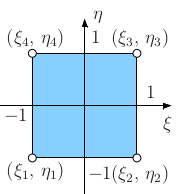

In [2]:
def quad(x,y):
    """
    x -> array-like of x values [x1,...,x4]
    y -> array-like of y values [y1,...,y4]
    """
    assert len(x) == 4
    assert len(y) == 4
    
    P = np.concatenate([np.array([x]), np.array([y])], axis=0).T
    return P

## Transformations
Transformation function from reference element to quadrilateral:

$ f(\xi_i, \eta_i) = \left( f_x, f_y \right) = \alpha_0 + \alpha_1 \xi_i + \alpha_2 \eta_i + \alpha_3 \xi_i \eta_i $   
$ \text{ for reference points} (\xi_i, \eta_i) = [(-1,-1), (1,-1), (1,-1), (-1,1)] $   
$ \text{ leads to a system of linear equations for the coefficient vectors alpha, beta } $

$ \xi  := \text{ vector of x-coordinates of reference element}$  
$ \eta := \text{ vector of y-coordinates of reference element}$



$ \alpha := \text{ vector of x-coordinate coefficients mapping reference element to quadrilateral}$  
$ \beta  := \text{ vector of y-coordinate  coefficients mapping reference element to quadrilateral}$

In [3]:
def transformation_coefficients(quad, referencequad):

    xi = referenceq[:,0]
    eta = referenceq[:,1]
    
    A = np.array([[1, xi[0], eta[0], xi[0]*eta[0]],
                  [1, xi[1], eta[1], xi[1]*eta[1]],
                  [1, xi[2], eta[2], xi[2]*eta[2]],
                  [1, xi[3], eta[3], xi[3]*eta[3]]])
                 
    alpha = la.solve(a=A, b=q[:,0]) # x-coeffs
    beta  = la.solve(a=A, b=q[:,1]) # y-coeffs
                 
    return alpha, beta

def ansatzfunction(xi: float, eta: float, alpha: [], beta: []):
    """
    Maps given xi, eta values to a coordinate (x or y), 
    given the mapping coefficients alpha
    """
    assert len(alpha) == len(beta) == 4
    
    basis = np.array([1, xi, eta, xi*eta])
    return np.array([np.dot(alpha, basis), np.dot(beta, basis)])


def inverse_ansatzfunction(x:float, y:float, alpha: [], beta: []):
    """
    Maps (x,y) to (xi,eta)
    for the x-mapping coefficients alpha 
    and the y-mapping coefficients beta.
    i.e. solves the equation f(eta,xi) = (x,y)
    """
    assert len(alpha) == len(beta) == 4
    xy = np.array([x,y])
    x0 = np.array([0.0,0.0])
    f = lambda v: ansatzfunction(*v, alpha, beta) - xy
    xi,eta = sciopt.newton_krylov(f, x0, f_tol=10e-7)
    
    return np.array([xi, eta]).round(6)

In [4]:
# tests
q = quad([0,6,10,2],[0,0,4,6])
referenceq = quad([-1,1,1,-1],[-1,-1,1,1])

alpha, beta = transformation_coefficients(q, referenceq)

for i in range(4):
    # transformation xi,eta -> x,y
    assert (ansatzfunction(*referenceq[i],alpha, beta) == q[i]).all()
    # transformation x,y -> xi,eta
    assert (inverse_ansatzfunction(*q[i], alpha, beta) == referenceq[i]).all()


## Interpolation
For discrete functions values $g(x_i,y_i)$, determine $g(x,y)$

In [5]:
def interpolate(ansatzfunc, referencequad, funcvalues):
    """
    Returns coefficients of ansatzfunc
    for the x-mapping coefficients alpha 
    and the y-mapping coefficients beta
    
    so that g(x,y) interpolates funcvalues 
    at referencequad points
    
    """
    pass

    #xy = np.array([x,y])
    #x0 = np.array([0.0,0.0])
    #f = lambda v: ansatzfunction(*v, alpha, beta) - xy
    #xi,eta = sciopt.newton_krylov(f, x0, f_tol=10e-7)
    
    #return np.array([xi, eta]).round(6)